## 2 company p limit investigation

In [84]:
import matplotlib.pyplot as plt
import numpy as np
import general_functions

In [165]:
def sim_two_companies(steps, alpha, r, print_steps=False):
    # Initial values
    p = np.array([1, 1], dtype=float)
    d = np.array([0, 0], dtype=float)
    p_hist = np.zeros((steps, 2))
    d_hist = np.zeros((steps, 2))
    p_hist[0, :] = p * 1
    d_hist[0, :] = d * 1
    
    income_list = [0.5]
    
    buyer_idx = 0
    seller_idx = 1
    
    for i in range(1, steps):
        # Check if growth is expected
        if alpha / 2 > r:
            # Find loan size
            average_income = np.mean(income_list[-2:])
            loan_size = (average_income * (alpha + 1) - p[buyer_idx]) / alpha
            loan_size_clipped = np.clip(a=loan_size, a_min=0, a_max=p[seller_idx])
            
            if print_steps:
                print(i)
                print("Average income: ", average_income, " Loan size: ", loan_size_clipped, " Comp 1 p: ", p[0], " Comp 2 p: ", p[1])
                print("Income list: ", income_list)
                print("")
                
            # Update values
            d[buyer_idx] += loan_size_clipped
            d[seller_idx] -= loan_size_clipped
            p[buyer_idx] = p[buyer_idx] + loan_size_clipped * alpha
            
            income_list.append(loan_size_clipped)
            
        # Pay interest
        d[d > 0] *= 1 + r
        
        # Store values
        p_hist[i, :] = p * 1
        d_hist[i, :] = d * 1
        
        # Swap buyer and seller
        buyer_idx, seller_idx = seller_idx, buyer_idx
            
    return p_hist, d_hist, income_list

In [166]:
sim_two_companies(steps=6, alpha=0.5, r=0, print_steps=True);

1
Average income:  0.5  Loan size:  0.0  Comp 1 p:  1.0  Comp 2 p:  1.0
Income list:  [0.5]

2
Average income:  0.25  Loan size:  0.0  Comp 1 p:  1.0  Comp 2 p:  1.0
Income list:  [0.5, 0.0]

3
Average income:  0.0  Loan size:  0.0  Comp 1 p:  1.0  Comp 2 p:  1.0
Income list:  [0.5, 0.0, 0.0]

4
Average income:  0.0  Loan size:  0.0  Comp 1 p:  1.0  Comp 2 p:  1.0
Income list:  [0.5, 0.0, 0.0, 0.0]

5
Average income:  0.0  Loan size:  0.0  Comp 1 p:  1.0  Comp 2 p:  1.0
Income list:  [0.5, 0.0, 0.0, 0.0, 0.0]



In [142]:
def plot_histories(p_hist, d_hist):
    steps = p_hist.shape[0]
    time_vals = np.arange(steps)
    fig, (ax, ax1) = plt.subplots(nrows=2)
    ax.plot(time_vals, p_hist[:, 0], ".--", label="Company 1")
    ax.plot(time_vals, p_hist[:, 1], ".--", label="Company 2")

    ax1.plot(time_vals, d_hist[:, 0],".--", label="Company 1")
    ax1.plot(time_vals, d_hist[:, 1], ".--", label="Company 2")
    
    ax.set(ylabel="Production capacity")
    ax1.set(xlabel="Time", ylabel="Debt")
    ax.legend()
    plt.show()


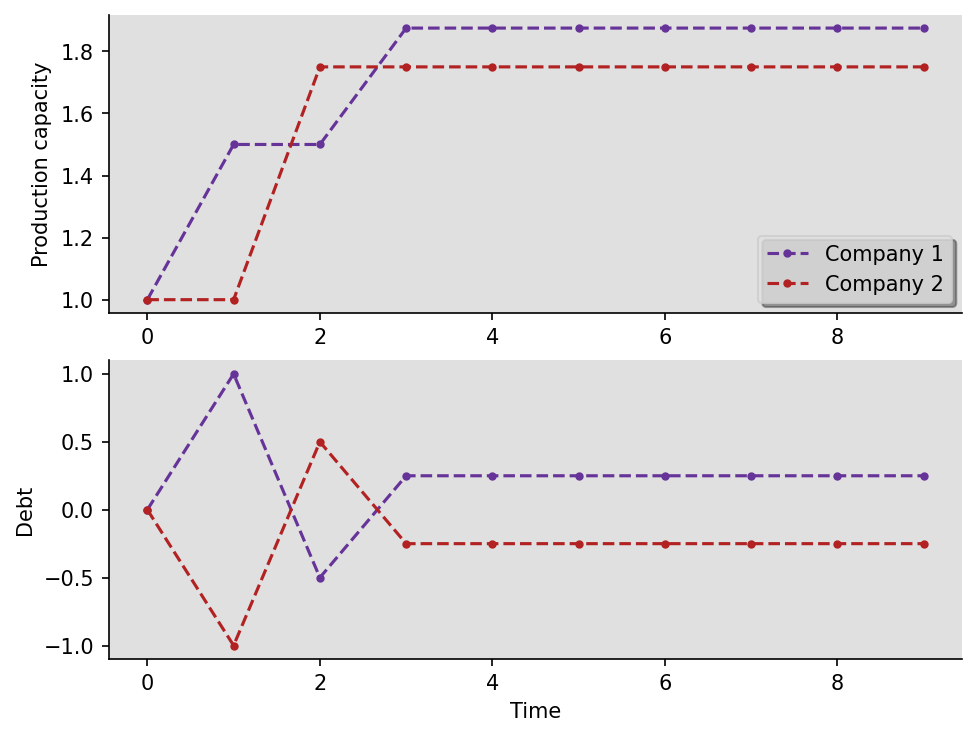

In [144]:
p_hist, d_hist, income_list = sim_two_companies(steps=6, alpha=0.5, r=0.0)
plot_histories(p_hist, d_hist)

### Why this does not work
$$ \Delta d_j = \min(\frac{\langle \Delta d \rangle - p_j}{\alpha}, p_i)$$
- Reaches steady state after a short period of time
- Happens because it is much easier to lower $\langle \Delta d\rangle$ than increase it.
- Increasing $\langle \Delta d \rangle$ requires , but this is unlikely as that would result in the first term being negative $(\langle \Delta d \rangle - p_j < 0)$. 
